In [25]:
#!pip install ipyleaflet

In [26]:
#!jupyter nbextension enable --py --sys-prefix ipyleaflet

In [27]:
#The list of dependicies that I need to create a dataframe, data visualizations and so forth

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib

In [28]:
#Here I read the csv data into a dataframe in which I will use to create charts and what not.
homeless_df = pd.read_csv("Homeless_Count2018.csv", 
                          usecols= ['State',
                                    'Homeless Unaccompanied Youth Under 18, 2018',
                                    'Homeless Unaccompanied Youth Age 18-24, 2018'],
                           encoding="utf-8")
homeless_df.head()

,State,"Homeless Unaccompanied Youth Under 18, 2018","Homeless Unaccompanied Youth Age 18-24, 2018"
0,US,"4,086","32,158"
1,AK,8,155
2,AL,44,114
3,AR,43,197
4,AZ,48,590


In [29]:
#Here I check what is the index and to confirm that it is the generic index that is generated 
#when I create a dataframe

homeless_df.index

RangeIndex(start=0, stop=52, step=1)

In [30]:
#I read another CSV file and name the dataframe as bed_count_df 
#to make it clear to me and other who read this code
bed_count_df = pd.read_csv("HIC_bedcount.csv", 
                        usecols=['State', 'Dedicated Youth Beds (OPH)'],
                        encoding="utf-8")
bed_count_df.head(10)

,State,Dedicated Youth Beds (OPH)
0,AK,0
1,AL,0
2,AR,0
3,AZ,10
4,CA,34
5,CO,0
6,CT,0
7,DC,0
8,DE,0
9,FL,20


In [31]:
#This is for my sake because I want to make sure that the generic index is create

bed_count_df.index

RangeIndex(start=0, stop=52, step=1)

In [32]:
#Here I merge the files and I join them on the state column,

merge_youths = pd.merge(homeless_df, bed_count_df, how ='left', on='State')


In [33]:
merge_youths.head()

,State,"Homeless Unaccompanied Youth Under 18, 2018","Homeless Unaccompanied Youth Age 18-24, 2018",Dedicated Youth Beds (OPH)
0,US,"4,086","32,158",NaN
1,AK,8,155,0.0
2,AL,44,114,0.0
3,AR,43,197,0.0
4,AZ,48,590,10.0


In [34]:
merge_youths = merge_youths.drop([0])

In [35]:
merge_youths.head()

,State,"Homeless Unaccompanied Youth Under 18, 2018","Homeless Unaccompanied Youth Age 18-24, 2018",Dedicated Youth Beds (OPH)
1,AK,8,155,0.0
2,AL,44,114,0.0
3,AR,43,197,0.0
4,AZ,48,590,10.0
5,CA,"1,426","10,970",34.0


In [36]:
merge_youths = merge_youths.set_index('State')

In [37]:

merge_youths.dtypes

Homeless Unaccompanied Youth Under 18, 2018      object
Homeless Unaccompanied Youth Age 18-24, 2018     object
Dedicated Youth Beds (OPH)                      float64
dtype: object

In [38]:
merge_youths

,"Homeless Unaccompanied Youth Under 18, 2018","Homeless Unaccompanied Youth Age 18-24, 2018",Dedicated Youth Beds (OPH)
State,,,
AK,8,155,0.0
AL,44,114,0.0
AR,43,197,0.0
AZ,48,590,10.0
CA,"1,426","10,970",34.0
CO,22,571,0.0
CT,7,180,0.0
DC,9,309,0.0
DE,1,52,0.0


In [39]:
merge_youths = merge_youths.rename(columns={'Homeless Unaccompanied Youth Under 18, 2018':'Unaccomp_Youths_Under18', 
                                            'Homeless Unaccompanied Youth Age 18-24, 2018':'Unaccomp_Youths_18_24', 
                                            'Dedicated Youth Beds (OPH)':'Dedicated_Beds'})

In [40]:
merge_youths.head()

,Unaccomp_Youths_Under18,Unaccomp_Youths_18_24,Dedicated_Beds
State,,,
AK,8,155,0.0
AL,44,114,0.0
AR,43,197,0.0
AZ,48,590,10.0
CA,"1,426","10,970",34.0


In [41]:
merge_youths.dtypes

Unaccomp_Youths_Under18     object
Unaccomp_Youths_18_24       object
Dedicated_Beds             float64
dtype: object

In [42]:
merge_youths.index
merge_youths['State'] = merge_youths.index

In [43]:
merge_youths.dtypes

Unaccomp_Youths_Under18     object
Unaccomp_Youths_18_24       object
Dedicated_Beds             float64
State                       object
dtype: object

In [44]:
#merge_youths['State'] = merge_youths['State'].str.replace(',','')
merge_youths['Unaccomp_Youths_Under18'] = merge_youths['Unaccomp_Youths_Under18'].str.replace(',','')
merge_youths['Unaccomp_Youths_18_24'] = merge_youths['Unaccomp_Youths_18_24'].str.replace(',','')
#merge_youths['Dedicated_Beds'] = merge_youths['Dedicated_Beds'].str.replace(',','')

In [45]:
#This is the area where I need to cconvert the columns Unaccomp_Youth_Under18 and Unaccomp_Youths_18_24
#into a float or int, it is really my choice.

merge_youths['Unaccomp_Youths_Under18'] = merge_youths['Unaccomp_Youths_Under18'].astype(float)
merge_youths['Unaccomp_Youths_18_24'] = merge_youths['Unaccomp_Youths_18_24'].astype(float)

In [46]:
merge_youths.dtypes

Unaccomp_Youths_Under18    float64
Unaccomp_Youths_18_24      float64
Dedicated_Beds             float64
State                       object
dtype: object

<IPython.core.display.Javascript object>


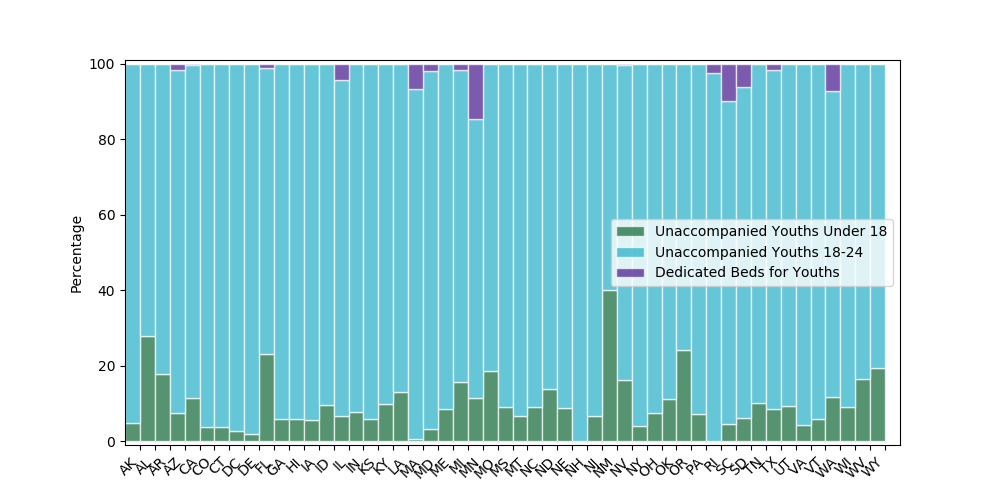

In [54]:
#merge_youths.plot(x='State', kind='bar')
#plt.show()
#plt.legend()

# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(merge_youths['Unaccomp_Youths_Under18']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k for i,j,k in zip(merge_youths['Unaccomp_Youths_Under18'],
                                 merge_youths['Unaccomp_Youths_18_24'], 
                                 merge_youths['Dedicated_Beds'])]

# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(merge_youths['Unaccomp_Youths_Under18'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
mid_rel = [i / j * 100 for  i,j in zip(merge_youths['Unaccomp_Youths_18_24'], totals)]

# Create the percentage of the total score the post_score value for each participant was
post_rel = [i / j * 100 for  i,j in zip(merge_youths['Dedicated_Beds'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       pre_rel, 
       # labeled 
       label='Unaccompanied Youths Under 18', 
       # with alpha
       alpha=0.7, 
       # with color
       color='#0f6635',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       mid_rel, 
       # with pre_rel
       bottom=pre_rel, 
       # labeled 
       label='Unaccompanied Youths 18-24', 
       # with alpha
       alpha=0.7, 
       # with color
       color='#22aec7', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       post_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(pre_rel, mid_rel)], 
       # labeled 
       label='Dedicated Beds for Youths',
       # with alpha
       alpha=0.7, 
       # with color
       color='#45158c', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, merge_youths['State'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-1, 101)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.legend(['Unaccompanied Youths Under 18', 
            'Unaccompanied Youths 18-24', 
            'Dedicated Beds for Youths'], 
           loc = 'center right')
# shot plot
plt.show()

In [55]:
f.savefig("Unaccomp_Youths_in_US.png")